# Performance Comparison

In this script we want to compare the performance of model 20 and 21 on:
* the test set of experiment 20 (standard test set, no flares included)
* the test set of experiment 21 (test set containing only flares)
* a test set taken from the not saturated dataset

In [9]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import torch
from sdo.pytorch_utilities import create_dataloader

from sdo.datasets.sdo_dataset import SDO_Dataset
from sdo.datasets.virtual_telescope_sdo_dataset import VirtualTelescopeSDO_Dataset
from sdo.models.vt_models.vt_unet import VT_UnetGenerator
from sdo.pipelines.training_pipeline import TrainingPipeline
from sdo.pipelines.virtual_telescope_pipeline import VirtualTelescopePipeline
from sdo.viz.plot_vt_outputs import plot_2Dhist_95cl

### Set variables

In [3]:
model_path20 = '/fdl_sdo_data/bucket/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/vale_exp_20/0600_vale_exp_20_model.pth'
model_path21 = '/fdl_sdo_data/bucket/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/vale_exp_21/vale_exp_21/0600_vale_exp_21_model.pth'
opt_path20 = '/fdl_sdo_data/bucket/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/vale_exp_20/0600_vale_exp_20_optimizer.pth'
opt_path21 = '/fdl_sdo_data/bucket/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/vale_exp_21/vale_exp_21/0600_vale_exp_21_optimizer.pth'
data_inventory =  '/home/Valentina/inventory_1904.pkl'
data_basedir='/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm'
data_basedir_nosat='/fdl_sdo_data/bucket/SDOMLmm_nosat'
results_path = '/home/Valentina/results/'
instr=["AIA", "AIA", "AIA", "AIA"]
channels=["0094", "0193", "0171", "0211"]

### Initialize pipelines and run test on desidered datasets

Internally the VT pipeline will load model the model, initialize the SDODataset and create the dataloader. We can't use the generic training pipeline because several methods we need are not specified for the base class, e.g. loss/primary metric

In [4]:
pipeline20_test20 =  VirtualTelescopePipeline(exp_name='test20_on20', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.3, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path20, 
                 saved_optimizer_path=opt_path20, start_epoch_at=600, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, d_events=None, datetime_range=None, dataloader_workers=4, scaling=True, 
                 optimizer_weight_decay=1e-5, optimizer_lr=1e-4, loss='smoothL1', unet_depth=4)

In [5]:
# the method returns np.mean(losses), np.mean(total_primary_metrics)
pipeline20_test20.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.0010856834317867954, 0.0471001746399062)

In [28]:
pipeline21_test20 =  VirtualTelescopePipeline(exp_name='test21_on20', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.3, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path21, 
                 saved_optimizer_path=opt_path21, start_epoch_at=600, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, d_events=None, datetime_range=None, dataloader_workers=4, scaling=True, 
                 optimizer_weight_decay=1e-5, optimizer_lr=1e-4, loss='smoothL1', unet_depth=3)

In [29]:
pipeline21_test20.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.043996314385107586, 0.26187001097769963)

In [21]:
pipeline20_test21 =  VirtualTelescopePipeline(exp_name='test20_on21', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.2, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path20, 
                 saved_optimizer_path=opt_path20, start_epoch_at=600, d_events={'path':'./flares_modelling.csv', 'buffer_h':1,
                 'buffer_m':0}, datetime_range=None, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, dataloader_workers=4, scaling=True, optimizer_weight_decay=1e-5, 
                 optimizer_lr=1e-4, loss='smoothL1', unet_depth=4)

This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-6-14 is not available
This day 2010-11-6 is not available


In [22]:
# the method returns np.mean(losses), np.mean(total_primary_metrics)
pipeline20_test21.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.0008924176945583895, 0.0436236597597599)

In [30]:
pipeline21_test21 =  VirtualTelescopePipeline(exp_name='test21_on21', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.2, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path21, 
                 saved_optimizer_path=opt_path21, start_epoch_at=600, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, d_events={'path':'./flares_modelling.csv', 'buffer_h':1,
                 'buffer_m':0}, datetime_range=None, dataloader_workers=4, scaling=True, 
                 optimizer_weight_decay=1e-5, optimizer_lr=1e-4, loss='smoothL1', unet_depth=3)

This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-6-14 is not available
This day 2010-11-6 is not available


In [31]:
# the method returns np.mean(losses), np.mean(total_primary_metrics)
pipeline21_test21.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.031899961177259684, 0.23231571167707443)

From the results above, model 20 seems superior to model 21

### Quick look at the map results

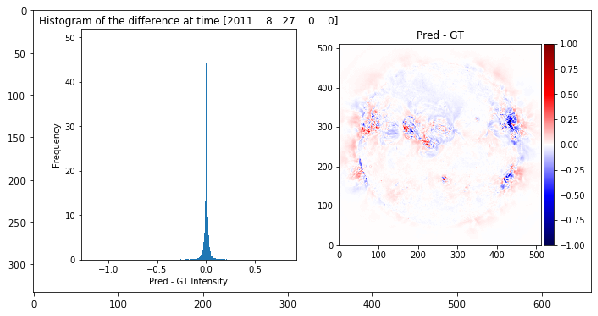

In [47]:
img20_20=mpimg.imread('../../results/0600_test20_on20_diff_hist_map_test.png')
plt.figure(figsize = (10,15))
imgplot = plt.imshow(img20_20)

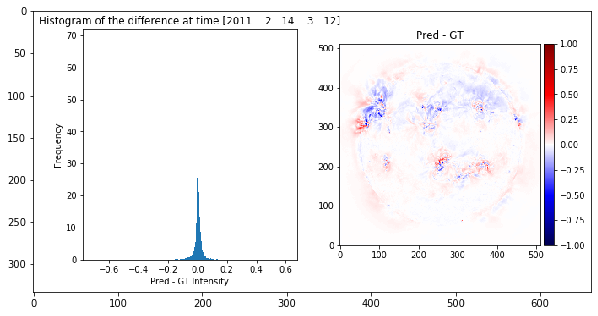

In [48]:
img20_21=mpimg.imread('../../results/0600_test20_on21_diff_hist_map_test.png')
plt.figure(figsize = (10,15))
imgplot = plt.imshow(img20_21)

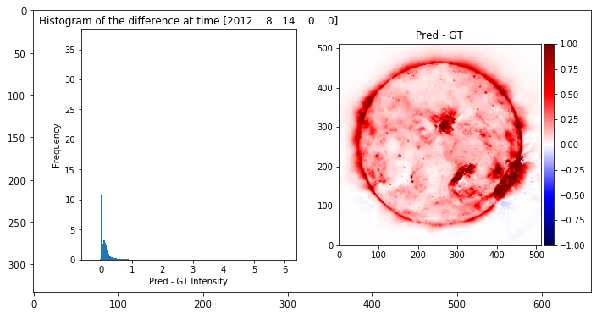

In [46]:
img21_20=mpimg.imread('../../results/0600_test21_on20_diff_hist_map_test.png')
plt.figure(figsize = (10,15))
imgplot = plt.imshow(img21_20)

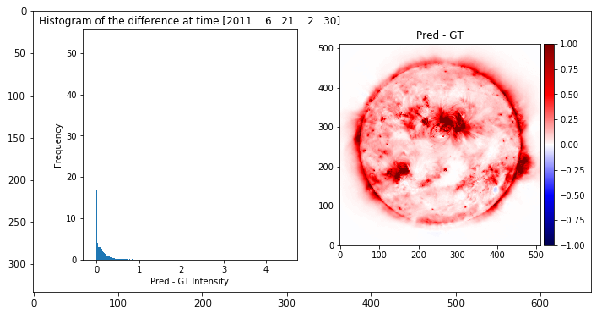

In [45]:
img21_21=mpimg.imread('../../results/0600_test21_on21_diff_hist_map_test.png')
plt.figure(figsize = (10,15))
imgplot = plt.imshow(img21_21)

The model retrained on flares only systematically OVERESTIMATE the values, also when predicting quiet Sun

Things to try: 

    * retrain on depth 4 (SUBMITTED)
    * retrain on a mixture of events (try to add much more buffer before and after)
    * test on not saturated data (DONE)
    * retrain on same dataset used for model 20 + flares (requires rewriting the data loader to accept a mix)

### Test on not saturated dataset

In [6]:
pipeline20_test_nosat =  VirtualTelescopePipeline(exp_name='test20_on_nosat', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir_nosat, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.3, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path20, 
                 saved_optimizer_path=opt_path20, start_epoch_at=600, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, d_events=None, datetime_range=None, dataloader_workers=4, scaling=True, 
                 optimizer_weight_decay=1e-5, optimizer_lr=1e-4, loss='smoothL1', unet_depth=4)

In [7]:
# the method returns np.mean(losses), np.mean(total_primary_metrics)
# on SDOML the performance was (0.0010868267023137637, 0.04714884697681382)
pipeline20_test_nosat.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.0010855808477139189, 0.047098348005896525)

In [54]:
pipeline21_test_nosat =  VirtualTelescopePipeline(exp_name='test21_on_nosat', model_version=3, actual_resolution=512, scaled_height=1,
                 scaled_width=1, device='cuda', data_basedir=data_basedir_nosat, data_inventory=data_inventory, instruments=instr,
                 wavelengths=channels, subsample=1, batch_size_train=32, batch_size_test=32,
                 test_ratio=0.3, log_interval=1, results_path=results_path, num_epochs=10, save_interval=1,
                 additional_metrics_interval=1, continue_training=True, saved_model_path=model_path21, 
                 saved_optimizer_path=opt_path21, start_epoch_at=600, yr_range=[2011, 2012], mnt_step=1, day_step=1, 
                 h_step=6, min_step=60, d_events=None, datetime_range=None, dataloader_workers=4, scaling=True, 
                 optimizer_weight_decay=1e-5, optimizer_lr=1e-4, loss='smoothL1', unet_depth=3)

In [55]:
# the method returns np.mean(losses), np.mean(total_primary_metrics)
# on SDOML the performance was (0.043996314385107586, 0.26187001097769963)
pipeline21_test_nosat.test(epoch=600, next_to_last_epoch=True, final_epoch=True)

(0.0439685494417236, 0.26183156740097774)

Not too surprisingly the average performance is the same as above. We expect the saturated pixels to be minority... In order to see if there is a difference we would need to focus on predictions on specific areas ... are there suggestions from the heliophysicists? Shall we create a metric that accounts only for energetic pixels?

Next thing to try: look at the 2d contour plot on the full dataset

### 2D histogram - 95 c.l.

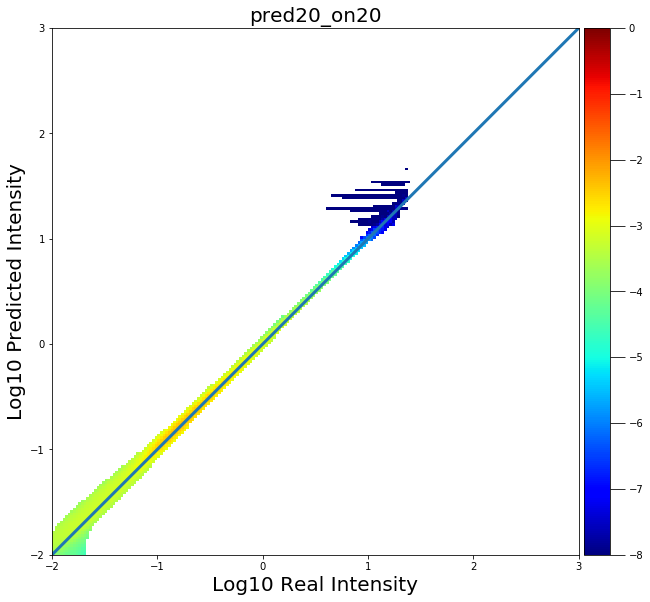

In [12]:
pred20_on20 = results_path + '0600_test20_on20_test_predictions.npy'
img_file = results_path + '2dhist_95cl_pred20_on20.png'

Y = np.load(pred20_on20)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_2Dhist_95cl(Y_test,Y_pred, mask_by_confidence=True, title='pred20_on20', savefig=img_file)

In [ ]:
pred20_on20nosat = results_path + '0600_test20_on_nosat_test_predictions.npy'
img_file = results_path + '2dhist_95cl_pred20_on20nosat.png'

Y = np.load(pred20_on20)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_2Dhist_95cl(Y_test,Y_pred, mask_by_confidence=True, title='pred20_on20_nosat', savefig=img_file)

### Create test data loader

In [21]:
test_dataset_20 = VirtualTelescopeSDO_Dataset(data_basedir=data_basedir, 
    data_inventory=data_inventory , 
    instr=["AIA", "AIA", "AIA", "AIA"], 
    num_channels = 4,
    channels=["0094", "0193", "0171", "0211"],
    yr_range=[2011, 2012], mnt_step=1, day_step=1, 
    h_step=6, min_step=60,
    resolution=512,
    # change to 1 when ready to run at scale                                          
    subsample=4,
    test=True,
    test_ratio=0.3,
    shuffle=False,
    normalization=0,
    scaling=True,
    apodize=False,
    holdout=False)

In [22]:
test_loader_20 = create_dataloader(test_dataset_20, batch_size=32, num_dataloader_workers=4, shuffle=False, train=False)

### Load models

In [5]:
model20 = VT_UnetGenerator(input_shape=[3, 512, 512])
state_dict = torch.load(model_path20)
new_state_dict = OrderedDict()
for k, v in state_dict.items():
        name = k.replace("module.", "")
        new_state_dict[name] = v
model20.load_state_dict(new_state_dict)

#optimizer20 = torch.optim.Adam(model20.parameters(), weight_decay=optimizer_weight_decay, lr=optimizer_lr)
#optimizer_state_dict = torch.load(optimizer_path20)
#optimizer20.load_state_dict(optimizer_state_dict)

<All keys matched successfully>

### Initialize pipeline

In [ ]:
pipeline20 =  VirtualTelescopePipeline(exp_name, model_version, actual_resolution, scaled_height,
                 scaled_width, device, data_basedir, data_inventory, instruments,
                 wavelengths, subsample, batch_size_train, batch_size_test,
                 test_ratio, log_interval, results_path, num_epochs, save_interval,
                 additional_metrics_interval, continue_training, saved_model_path, saved_optimizer_path,
                 start_epoch_at, d_events, datetime_range,yr_range, mnt_step, day_step, h_step, min_step, dataloader_workers,
                 scaling, optimizer_weight_decay, optimizer_lr, loss, unet_depth

In [23]:
device = torch.device('cuda', 0)
model20.cuda(device)
pipeline20 =  TrainingPipeline(exp_name='test20', train_dataset=None, test_dataset=None, train_loader=None, 
                               test_loader=test_loader_20, batch_size_train=None, batch_size_test=32, 
                               model=model20, optimizer=None, log_interval=1, results_path=results_path,
                               num_epochs=None, device= torch.device('cuda'), save_interval=1, additional_metrics_interval=1,
                               continue_training=False, saved_model_path=None, saved_optimizer_path=None, 
                               start_epoch_at=0, scaling=False)

In [24]:
pipeline20.test(epoch=0, next_to_last_epoch=True, final_epoch=True)

TypeError: float() argument must be a string or a number, not 'NoneType'

### Model 21 

In [ ]:
test_dataset_21 = VirtualTelescopeSDO_Dataset(data_basedir=data_basedir, 
    data_inventory=data_inventory , 
    instr=["AIA", "AIA", "AIA", "AIA"], 
    num_channels = 4,
    channels=["0094", "0193", "0171", "0211"],
    d_events={'path':'./flares_modelling.csv',
              'buffer_h':1,
              'buffer_m':0},
    resolution=512,
    subsample=1,
    test=True,
    test_ratio=0.2,
    shuffle=False,
    normalization=0,
    scaling=True,
    apodize=False,
    holdout=False)

In [ ]:
test_loader_21 = create_dataloader(test_dataset_21, batch_size=128, num_dataloader_workers=4, shuffle=False, train=False)

In [ ]:
model21 = VT_UnetGenerator(input_shape=[3, 512, 512], depth=3)
state_dict = torch.load(model_path21)
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace("module.", "") 
    new_state_dict[name] = v
model21.load_state_dict(new_state_dict)

In [33]:
pipeline21 =  TrainingPipeline(exp_name='test21', train_dataset=None, test_dataset=None, train_loader=None, 
                               test_loader=test_loader_21, batch_size_train=None, batch_size_test=16, 
                               model=model20, optimizer=None, log_interval=1, results_path=results_path,
                               num_epochs=None, device=0, save_interval=1, additional_metrics_interval=1,
                               continue_training=False, saved_model_path=None, saved_optimizer_path=None, 
                               start_epoch_at=0, scaling=False)